# 📊 Explication de SHAP et XGBoost pour la Prédiction du cancer du sein ( dataset Breast cancer choisi comme alternative)

Ce projet utilise **SHAP (Shapley Additive Explanations)** pour interpréter un modèle **XGBoost** destiné à prédire le **Cancer du sein**.  
L'objectif est de comprendre **comment chaque variable influence la décision du modèle sur un plan local**.

## 🔍 **Plan du Notebook**
1. **Chargement et préparation des données**
2. **Entraînement du modèle XGBoost**
3. **Analyse des prédictions avec SHAP**
4. **Visualisation de l'importance des variables**
5. **Analyse détaillée des prédictions individuelles**

---
## 📥 **Importation des Bibliothèques**
Nous allons importer toutes les bibliothèques nécessaires pour le projet.




In [ ]:
# 📥 Importation des bibliothèques
import shap
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import warnings
import seaborn as sns


# Réglages
shap.initjs()
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
plt.rc("font", size=16)


# 📊 Chargement et Préparation des Données

Nous allons utiliser le dataset breast cancer pour simuler un modèle de prédiction du **cancer du sein**.  


## 🛠 **Préparation**



In [ ]:
# 📥 Chargement des données
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Convertir en DataFrame
y = pd.Series(data.target, name="target")  # Convertir en Série
y = y.map({0: 1, 1: 0})  # Inverser pour garder la convention label(1)=cancer

# 🔀 Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=80)

# 📊 Affichage de la distribution initiale des classes
print("📌 Distribution des classes :")
print(pd.Series(y).value_counts())

# 🔍 Aperçu des données
print("\n🔍 Aperçu des premières lignes du dataset :")
print(X.head())



📌 Distribution des classes :
target
0    357
1    212
Name: count, dtype: int64

🔍 Aperçu des premières lignes du dataset :
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980         

# 🚀 Entraînement du Modèle XGBoost

In [ ]:
# 📌 Création et entraînement du modèle XGBoost
# Création du modèle XGBoost
xgb = XGBClassifier(n_estimators=200,
                    learning_rate=0.05,
                    max_depth=8,
                    scale_pos_weight=proportion_class,
                    use_label_encoder=True,
                    random_state=80)

# Entraînement du modèle
xgb.fit(X_train, y_train)

# 🔎 Évaluation du modèle
accuracy = xgb.score(X_test, y_test)
print(f"\n✅ accuracy du modèle sur les données de test : {accuracy:.2f}")

# 🛠 Vérification des paramètres du modèle
print("\n📌 Paramètres du modèle XGBoost :")
print(xgb.get_params())



✅ accuracy du modèle sur les données de test : 0.96

📌 Paramètres du modèle XGBoost :
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 80, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 0.5938375350140056, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_

# 🚀 Aperçu de la prédiction du Modèle XGBoost

Text(0.5, 1.0, 'Confusion Matrix (Train set)')

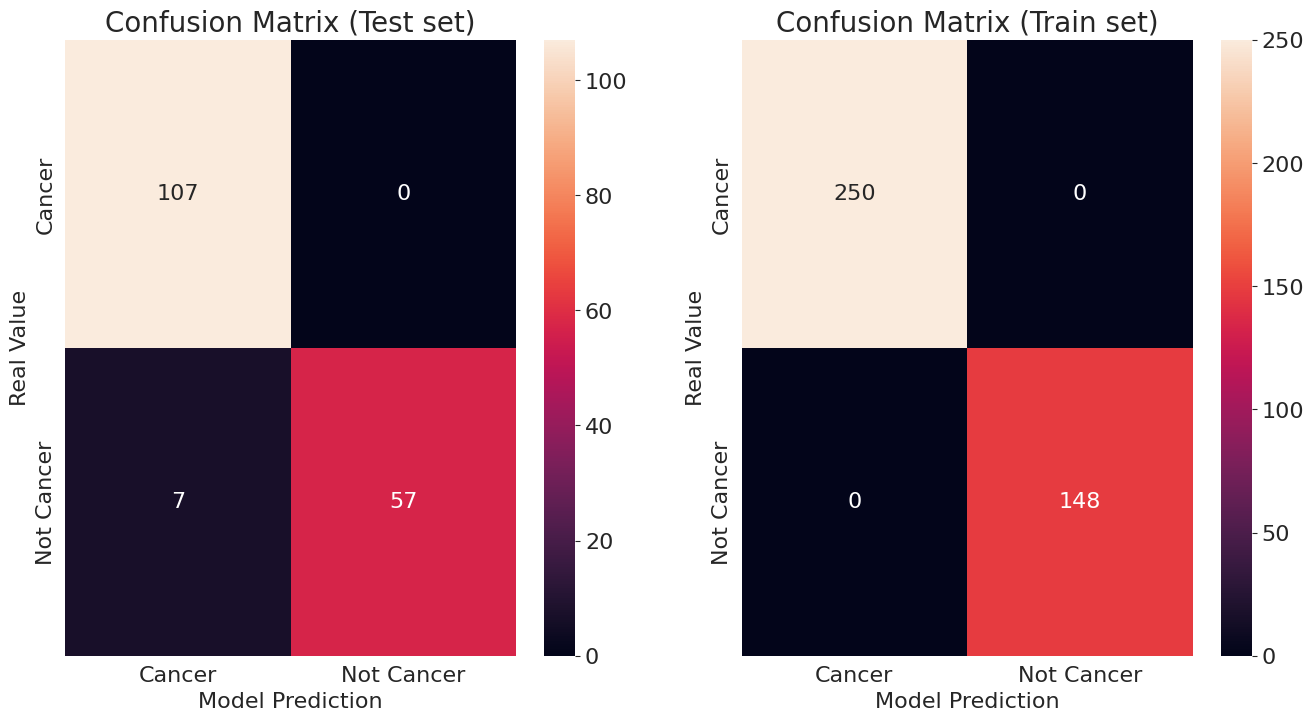

In [ ]:
y_hat = xgb.predict(X_test)
cf = metrics.confusion_matrix(y_pred=y_hat, y_true=y_test)
cf_train = metrics.confusion_matrix(y_pred=xgb.predict(X_train), y_true=y_train)
names_df = [
    "Cancer",
    "Not Cancer"
]
cf_df = pd.DataFrame(data=cf, columns=names_df, index=names_df)
cf_train_df = pd.DataFrame(data=cf_train, columns=names_df, index=names_df)
fig, ax = plt.subplots(ncols=2, figsize=(16,8))

sns.heatmap(cf_df, fmt="d",annot=True, ax=ax[0])
ax[0].set_xlabel("Model Prediction", size=16)
ax[0].set_ylabel("Real Value", size=16)
ax[0].set_title("Confusion Matrix (Test set)", size=20)

sns.heatmap(cf_train_df, fmt="d",annot=True, ax=ax[1])
ax[1].set_xlabel("Model Prediction", size=16)
ax[1].set_ylabel("Real Value", size=16)
ax[1].set_title("Confusion Matrix (Train set)", size=20)

# 🔍 SHAP VALUES

Maintenant que notre modèle **XGBoost** est entraîné, nous allons utiliser **SHAP (Shapley Additive Explanations)** pour expliquer **comment il prend ses décisions (ici c'est le dataset X_test qui est utilisé)




In [ ]:
explainer = shap.TreeExplainer(xgb, X_test, model_output = "raw") # modèle basé sur des arbres de décision
shap_values = explainer.shap_values(X_test)
print(shap_values.__class__)
print(shap_values.shape)

<class 'numpy.ndarray'>
(171, 30)


 #### 1- Force des valeurs SHAP pour une prédiction, contribution de  chaque feature à la prédiction

 Observons les forces et leurs directions pour chaque valeur (X_j) des features

In [ ]:
shap.initjs()
patient_index = 1
shap.force_plot(explainer.expected_value, shap_values[patient_index,:], X.iloc[patient_index,:])

Vérifions la prédiction:

In [ ]:
# Patient real target value
diagnosis_map = {1.0: "Cancer",
                0.0: "Not Cancer"}
print("-------Diagnostic du terrain------")

print(y.replace(diagnosis_map).iloc[patient_index])

print("-------diagnostic prédit------")
pred_class = xgb.predict(X.loc[patient_index:patient_index, :])[0]
if pred_class==0.0:
    pred_diagnosis = diagnosis_map[0.0]
    p1 = xgb.predict_proba(X.loc[patient_index:patient_index, :])[0][0]
    p1_round = round(p1,3)
else:
    pred_diagnosis = diagnosis_map[1.0]
    p1 = xgb.predict_proba(X.loc[patient_index:patient_index, :])[0][1]
    p1_round = round(p1,3)
print(f'Probabilité du diagnostic {pred_diagnosis} \n{p1_round}')



-------Diagnostic du terrain------
Cancer
-------diagnostic prédit------
Probabilité du diagnostic Cancer 
0.9950000047683716


#### 2- Waterfall plot de SHAP pour la prediction ( sur une observation de X_test)

Ici on visualise le valeurs de shapley proprement dites et leur contribution en partant de la base value ( le phi 0) , c'est la visualisation de l'équation :
 \begin{equation}
g(z') = \phi_0 + \sum_{i=1}^{M}\phi_i z'_i
\end{equation}

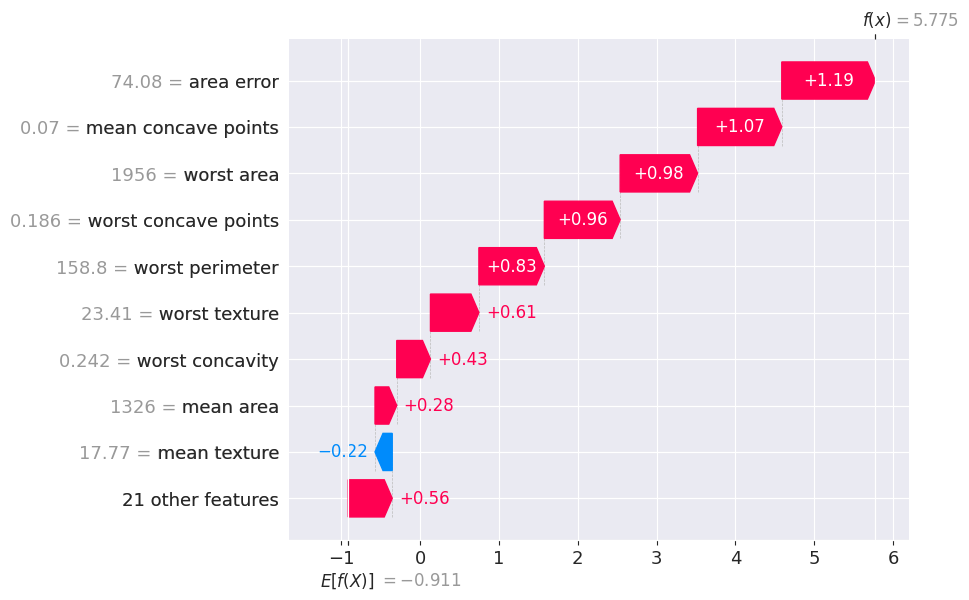

In [ ]:
# Créer un objet explanator
shap_explanation = shap.Explanation(
    values=shap_values[patient_index,:],
    base_values=explainer.expected_value,
    data=X.iloc[patient_index,:].values,
    feature_names=X.columns
)

# Créer le waterfall plot
shap.plots.waterfall(shap_explanation)

#### Etendre l'interprétabilté

Les valeurs SHAP, bien qu'initialement conçues pour une interprétation locale (au niveau d'une prédiction individuelle), peuvent être agrégées pour fournir des insights globaux sur le modèle de plusieurs façons :

#### 3- Le summary plot
chaque point est une observation d'une feature, caractérisée par une couleur qui détermine la valeur faible ou élevée de cette dernière, et avec un emplacement horizontal correspondant à sa contribution positive ou négative à la prédiction finale (la valeur de shapley).

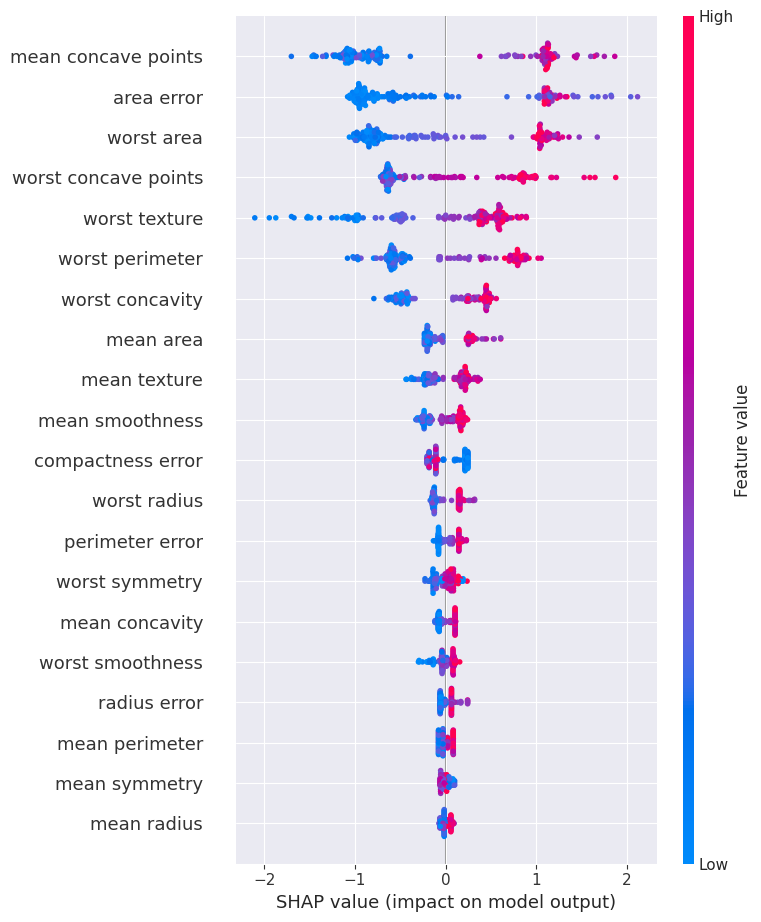

In [ ]:
shap.summary_plot(shap_values, X_test, show=False)

#### Alternative plus moderne avec plots.beeswarm

<Axes: xlabel='SHAP value (impact on model output)'>

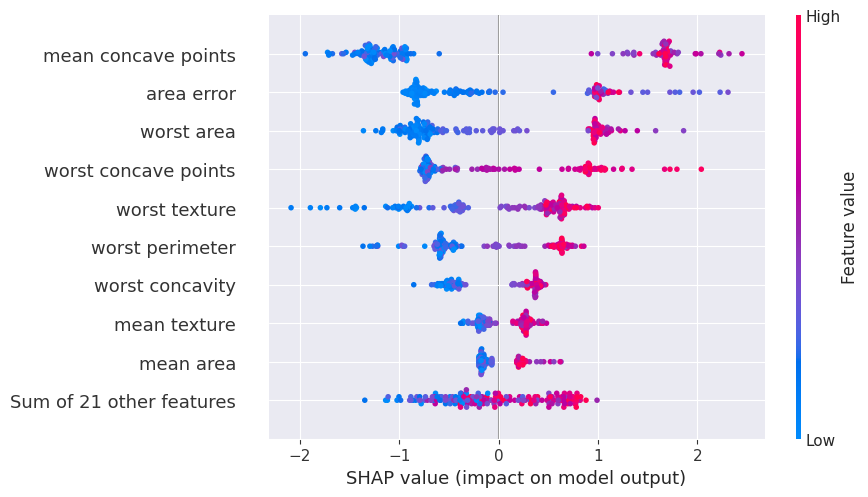

In [ ]:

# Créer d'abord l'explainer
explainer = shap.TreeExplainer(xgb)

# Calculer les valeurs SHAP en tant qu'objet Explanation
shap_values = explainer(X_test)

# Maintenant on peut utiliser la fonction beeswarm
shap.plots.beeswarm(shap_values, show=False)

#### 4- Focus sur une variable

> Ajouter une citation




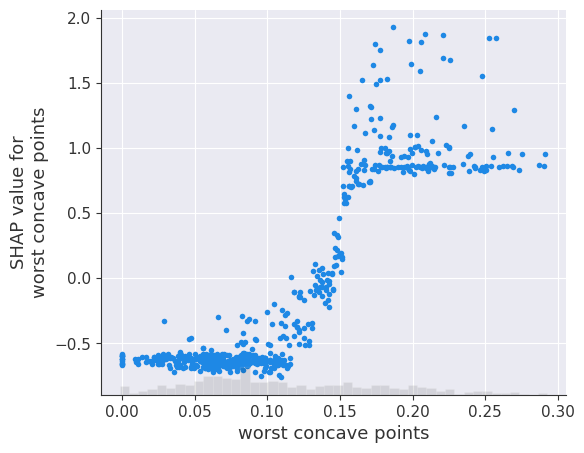

In [ ]:
shap.plots.scatter(shap_values[:, "worst concave points"])

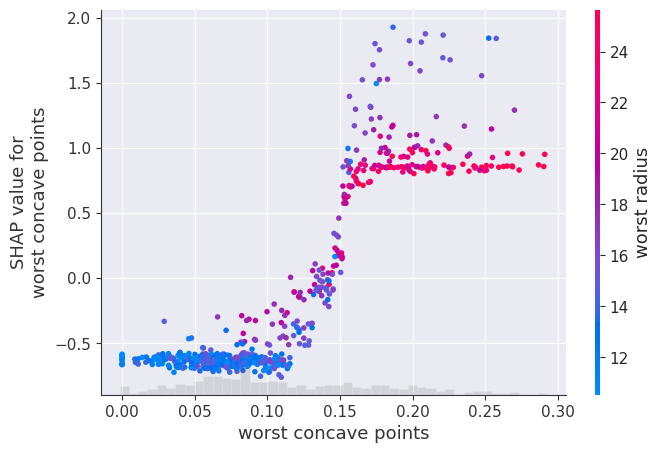

In [ ]:
shap.plots.scatter(shap_values[:, "worst concave points"], color=shap_values)